In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams["figure.figsize"]=15,10

## Cargamos los datos informados por el Ministerios de Ciencia

In [2]:
url  = "https://raw.githubusercontent.com/MinCiencia/Datos-COVID19/master/output/producto5/TotalesNacionales.csv"
data = pd.read_csv(url, error_bad_lines=False)
data = data.rename(columns={"Fecha": "Item"}) #Le cambiamos el nombre a la columna
data

,Item,2020-03-03,2020-03-04,2020-03-05,2020-03-06,2020-03-07,2020-03-08,2020-03-09,2020-03-10,2020-03-11,...,2020-05-02,2020-05-03,2020-05-04,2020-05-05,2020-05-06,2020-05-07,2020-05-08,2020-05-09,2020-05-10,2020-05-11
0,Casos nuevos con sintomas,0.0,2.0,1.0,1.0,2.0,3.0,5.0,2.0,6.0,...,1246,1112,876,1317,893,1343,1183,1004,1406,975
1,Casos totales,1.0,3.0,4.0,5.0,7.0,10.0,15.0,17.0,23.0,...,18435,19663,20643,22016,23048,24581,25972,27219,28866,30063
2,Casos recuperados,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,9572,10041,10415,10710,11189,11664,12160,12667,13112,13605
3,Fallecidos,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,247,260,270,275,281,285,294,304,312,323
4,Casos activos,1.0,3.0,4.0,5.0,7.0,10.0,15.0,17.0,23.0,...,8616,9362,9958,11031,11578,12632,13518,14248,15442,16135
5,Casos nuevos sin sintomas,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,181,116,104,56,139,190,208,243,241,222
6,Casos nuevos totales,0.0,2.0,1.0,1.0,2.0,3.0,5.0,2.0,6.0,...,1427,1228,980,1373,1032,1533,1391,1247,1647,1197


In [3]:
def dia_cambio_metodologia(X,Y):
    plt.text(X, Y, 'Cambio de metodologia')

In [4]:
def labelonbars(X, Y):
    n = len(X)
    for i in range (n):
        number = '{:,}'.format(int(Y[i])).replace(',', '.')
        plt.annotate(
            number, xy=(X[i], Y[i]),
            xytext =(0, 10),
            textcoords="offset points",
            ha ='center', va='bottom')
        
def Graph(name_item):
    data_by_item = data[(data.Item == name_item)].values
    Y            = np.delete(data_by_item, 0)
    X            = data.columns[1:]
    plt.plot(X, Y, 'b')
    plt.plot(X, Y, 'bo')
    labelonbars([X[len(X)-1]], [Y[len(X)-1]])
    #dia_cambio_metodologia('2020-04-29',770)
    plt.xlabel('Fecha')
    plt.ylabel(name_item)
    plt.title(name_item)
    plt.grid()
    plt.xticks(X, rotation='vertical')
    plt.show()

## Casos totales

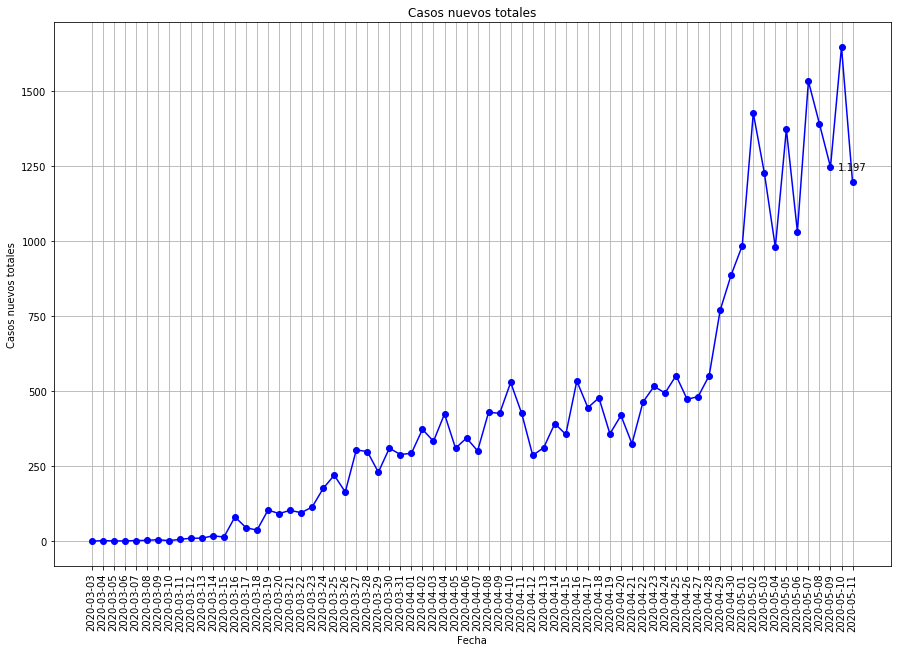

In [5]:
Graph("Casos nuevos totales")

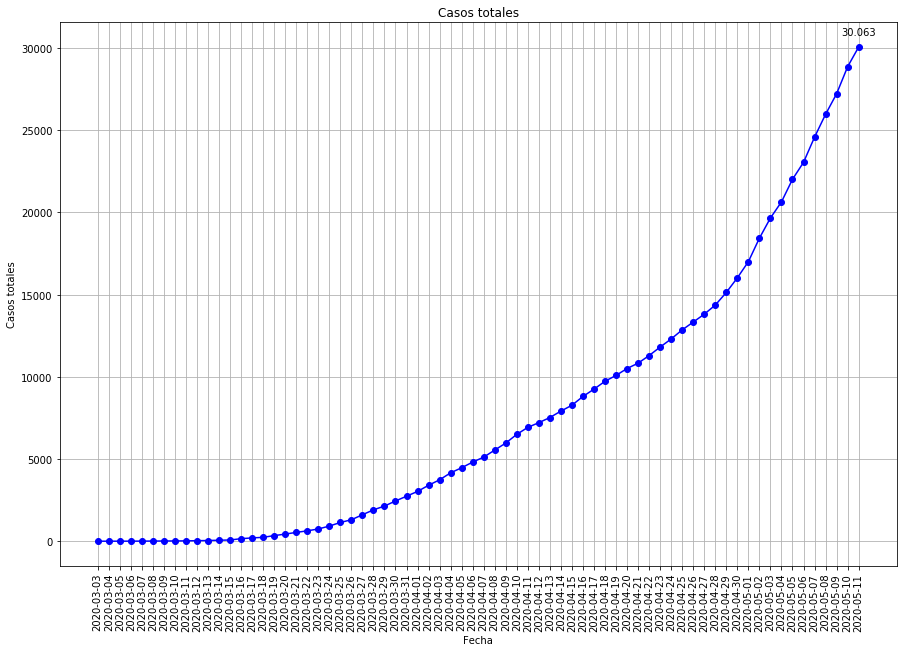

In [6]:
Graph("Casos totales")

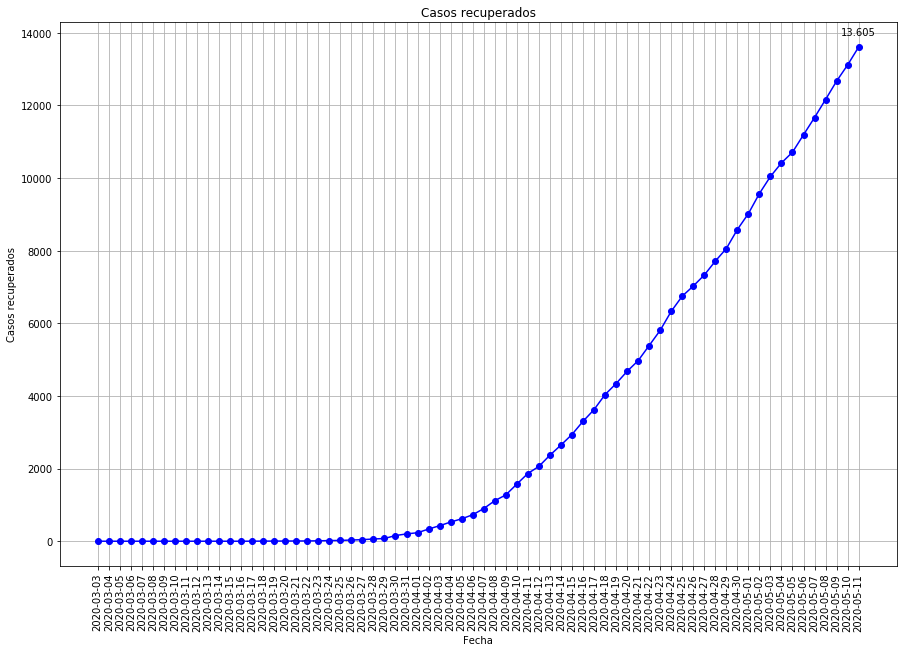

In [7]:
Graph("Casos recuperados")

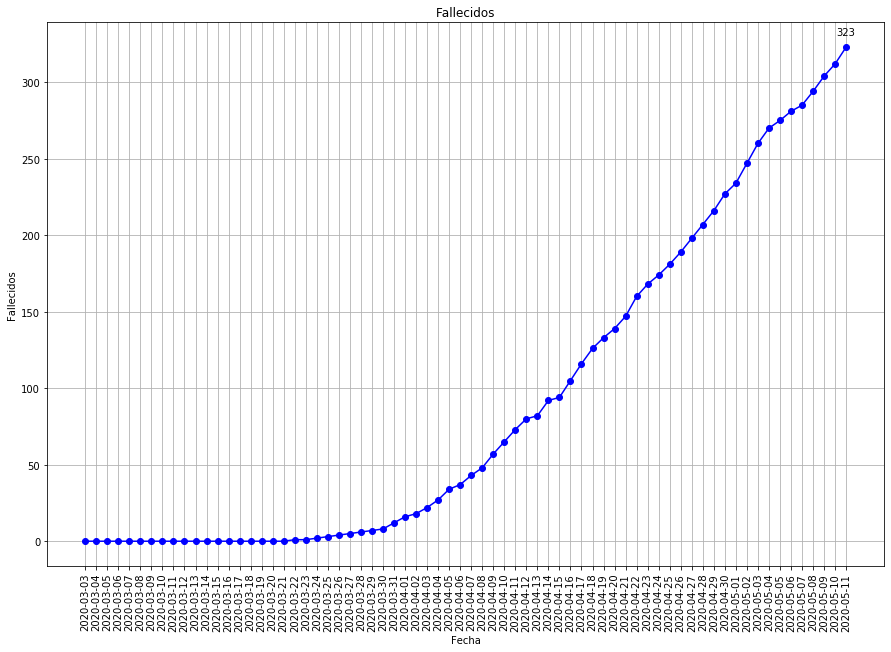

In [8]:
Graph("Fallecidos")

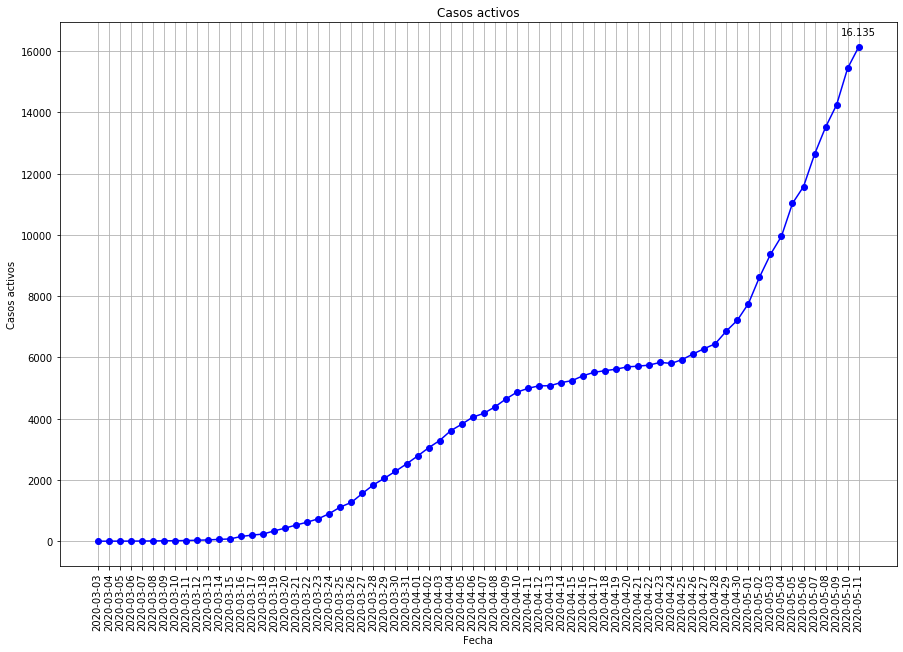

In [9]:
Graph("Casos activos")

## Tasa de Letalidad

In [10]:
fallecidos  = data[data["Item"]=="Fallecidos"].values.tolist()[0][1:]
contagiados = data[data["Item"]=="Casos totales"].values.tolist()[0][1:]

In [11]:
df_letalidad = pd.DataFrame({
    'fecha': data.columns[1:],
    'contagiados': contagiados,
    'fallecidos': fallecidos
})
df_letalidad["letalidad"] = (df_letalidad["fallecidos"] / df_letalidad["contagiados"]) * 100

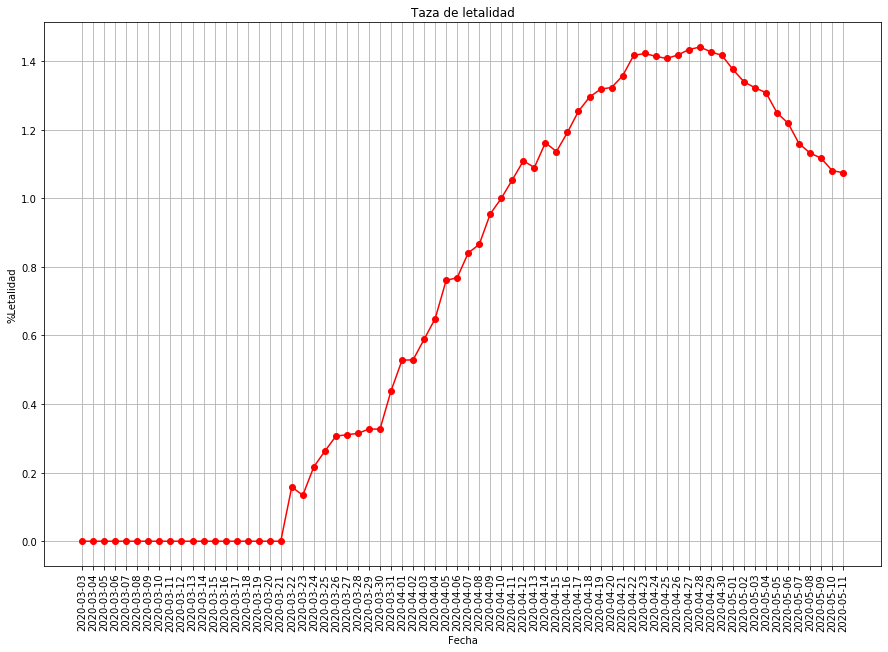

In [12]:
def labelonbars(X, Y):
    n = len(X)
    for i in range (n):
        number = '{0:.1f}'.format(float(Y[i])).replace(',', '.')
        plt.annotate(
            number, xy=(X[i], Y[i]),
            xytext =(0, 10),
            textcoords="offset points",
            ha ='center', va='bottom',
            size='7')

Y            = df_letalidad["letalidad"].values.tolist()
X            = data.columns[1:]
plt.plot(X, Y, 'ro-')
#labelonbars(X, Y)
plt.xlabel('Fecha')
plt.ylabel('%Letalidad')
plt.title('Taza de letalidad')
plt.grid()
plt.xticks(X, rotation='vertical')
#plt.yticks(np.arange(0, 10, 1))
plt.show()